# Pytorch: Tensors And Autograd
https://pytorch.org/tutorials/beginner/examples_autograd/polynomial_autograd.html  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



PyTorch: Tensors and autograd
-------------------------------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $pi$ by minimizing squared Euclidean distance.

This implementation computes the forward pass using operations on PyTorch
Tensors, and uses PyTorch autograd to compute gradients.


A PyTorch Tensor represents a node in a computational graph. If ``x`` is a
Tensor that has ``x.requires_grad=True`` then ``x.grad`` is another Tensor
holding the gradient of ``x`` with respect to some scalar value.



In [2]:
import torch
import math


dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device = device, dtype = dtype)
y = torch.sin(x)

In [3]:
# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device = device, dtype = dtype, requires_grad = True)
b = torch.randn((), device = device, dtype = dtype, requires_grad = True)
c = torch.randn((), device = device, dtype = dtype, requires_grad = True)
d = torch.randn((), device = device, dtype = dtype, requires_grad = True)

learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * x + {c.item()} * x**2 + {d.item()} * x**3')

99 3590.001953125
199 2379.4326171875
299 1578.2003173828125
399 1047.8551025390625
499 696.7889404296875
599 464.3809814453125
699 310.51336669921875
799 208.6355438232422
899 141.17474365234375
999 96.49979400634766
1099 66.91114807128906
1199 47.31251525878906
1299 34.32929992675781
1399 25.727476119995117
1499 20.02767562866211
1599 16.250314712524414
1699 13.746668815612793
1799 12.086929321289062
1899 10.986466407775879
1999 10.256706237792969
Result: y = -0.009308603592216969 + 0.8208630681037903 * x + 0.0016058888286352158 * x**2 + -0.08822708576917648 * x**3


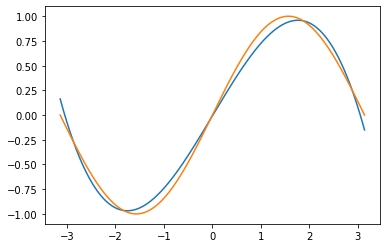

In [4]:
y = a + b * x + c * x ** 2 + d * x ** 3

plt.plot(x.cpu(), y.cpu().detach()); 
plt.plot(x.cpu(), np.sin(x.cpu()));